## NH3 reference cell around 2928 nm

### Workflow 

     1. initiate a 'Spectra' object
     2. add observer
     3. add gass_cells & gasses
     4. download data (runs the hapi functions)
     5. plot
    
    comment: the arguments of the gas_cell method are the default values as on spectracalc.com
             ! when using multiple gas cells, the spectra are calculated seperately and plotted on top of each other. (Not combined absorption as in spectracalc)

In [1]:
%%capture
%load_ext autoreload
%autoreload 2
import os, sys
parent = os.path.dirname(os.getcwd())
sys.path.append(parent)
from classes import Spectra, Observer, HiddenPrints

In [2]:
%%capture
#%% 1. create a spectrum
my_spectrum = Spectra(name = 'NH3_Line_2928_nm')

#%% 2. add an observer
my_spectrum.observer = Observer(unit  = 'lam',      #'wav' : wavenumer [1/cm] | 'lam' : wavelength [nm]
                                lower =  2927.5,    
                                upper =  2929,   
                                )
#%% 3. add gas_cells (may consist of multiple gasses) with gasses
# cell 0 - NH3 room conditions
'''
my_spectrum.add_gas_cell(temperature    = 296,          # K
                         pressure       = 1,         # atm
                         length         = 100,            # cm
                         #diluent        = {'air':1},
                         no_gasses      = 1)            # number of gasses)
my_spectrum.gas_cells[-1].add_gas(gas_name  = "NH3",
                                 VMR       = 5E-4)   
'''
# cell 0 - NH3 reference cell in N2 SHOULD
my_spectrum.add_gas_cell(temperature    = 296,          # K
                         pressure       = 0.05,         # atm
                         length         = 2,            # cm
                         #diluent        = {'air':1},
                         no_gasses      = 1)            # number of gasses)
my_spectrum.gas_cells[-1].add_gas(gas_name  = "NH3",
                                  VMR       = 60000E-6)

# cell2 - NH3 reference cell in N2 IS
my_spectrum.add_gas_cell(temperature    = 296,          # K
                         pressure       = 1,         # atm
                         length         = 2,            # cm
                         #diluent        = {'air':1},
                         no_gasses      = 1)            # number of gasses)
my_spectrum.gas_cells[-1].add_gas(gas_name  = "NH3",
                                  VMR       = 60000E-6)

# cell3 - NH3 cell 1 - 250 ppmm
my_spectrum.add_gas_cell(temperature    = 296,          # K
                         pressure       = 1,         # atm
                         length         = 3,            # cm
                         no_gasses      = 1)            # number of gasses)
my_spectrum.gas_cells[-1].add_gas(gas_name  = "NH3",
                                  VMR       = 0.75E-2)

# cell4 - NH3 cell 2 - 700 ppmm
my_spectrum.add_gas_cell(temperature    = 296,          # K
                         pressure       = 1,         # atm
                         length         = 2,            # cm
                         #diluent        = {'air':1},
                         no_gasses      = 1)            # number of gasses)
my_spectrum.gas_cells[-1].add_gas(gas_name  = "NH3",
                                  VMR       = 3.5E-2)


# cell 3 - To check if there is any water
my_spectrum.add_gas_cell(temperature    = 296,          # K
                         pressure       = 1,         # atm
                         length         = 100,            # cm
                         no_gasses      = 1)            # number of gasses)
my_spectrum.gas_cells[-1].add_gas(gas_name  = "H2O",
                                  VMR       = 10E-2)

#%% 4. download (running hapi functions)
with HiddenPrints():            # disables hapi stdout
    my_spectrum.download(line_list      = False,    #by setting to false, the linelist will nor be downloaded nor plotted.
                          min_intensity = 5E-23 )   

To double check that everything is as desired, you can print a summary of your setup.

The plot function may be adjusted to ones needs.
If line list has not been downloaded (step 4), it will not be plotted.

Summary of the spectum NH3_Line_2928_nm: 
	 lower: 2927.5 [nm] 
	 upper: 2929 [nm] 
Gas cell 0: 
	 length: 2 cm | temp: 296 K|pressure: 0.05 atm|gas matrix: {'air': 0.94, 'self': 0.06} 
	 Gasses (VMR): 
	 	 NH3: 0.06 
Gas cell 1: 
	 length: 2 cm | temp: 296 K|pressure: 1 atm|gas matrix: {'air': 0.94, 'self': 0.06} 
	 Gasses (VMR): 
	 	 NH3: 0.06 
Gas cell 2: 
	 length: 3 cm | temp: 296 K|pressure: 1 atm|gas matrix: {'air': 0.9925, 'self': 0.0075} 
	 Gasses (VMR): 
	 	 NH3: 0.0075 
Gas cell 3: 
	 length: 2 cm | temp: 296 K|pressure: 1 atm|gas matrix: {'air': 0.965, 'self': 0.035} 
	 Gasses (VMR): 
	 	 NH3: 0.035 
Gas cell 4: 
	 length: 100 cm | temp: 296 K|pressure: 1 atm|gas matrix: {'air': 0.9, 'self': 0.1} 
	 Gasses (VMR): 
	 	 H2O: 0.1 



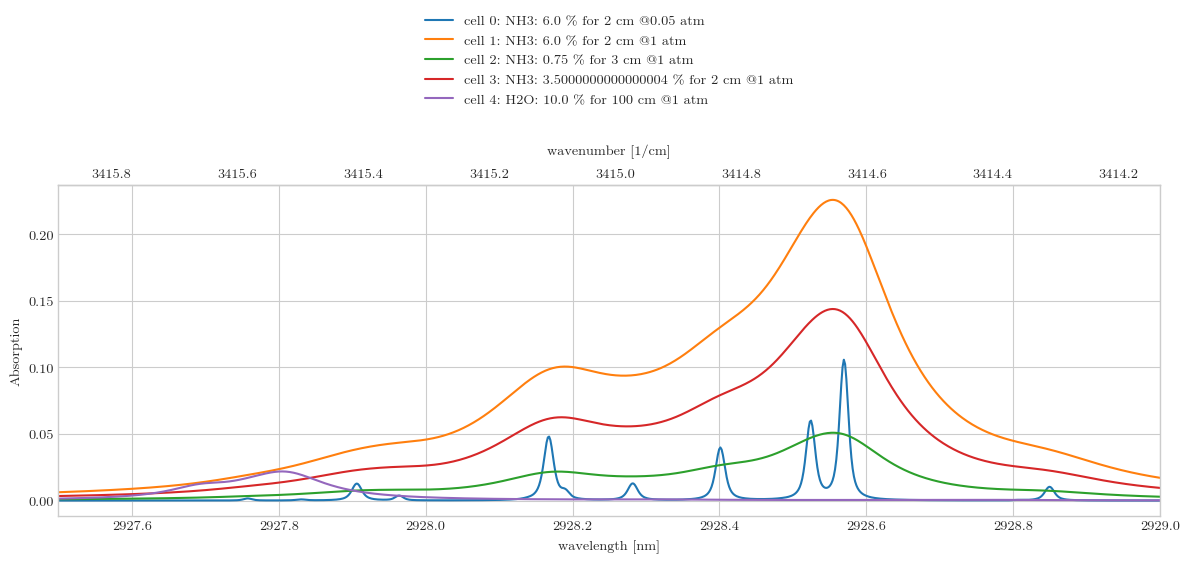

In [3]:
#%% 5. plot
my_spectrum.plot(figsize = (12,6),
                 export = True)
print(my_spectrum)

In [4]:
#%% 6. export
my_spectrum.export(directory = 'exports')

Exported the absorption data to: exports
